### Importing required libraries

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Storing CSV in a DataFrame

In [167]:
df = pd.read_csv('europe-motorbikes-zenrows.csv')

### Take a peak into the dataset

In [168]:
df.head()
# Display the first 5 rows of the DataFrame
# 5 is default value for head()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
0,23990,150,218.00,Honda,03/2020,Gasoline,Manual,Demonstration,CBR1000RR-R Fireblade SP,/offers/honda-others-cbr1000rr-r-fireblade-sp-...
1,7500,2871,90.00,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.00,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.00,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...


In [169]:
df.tail()
# Display the last 5 rows of the DataFrame
# 5 is default value for tail()

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
34912,17300,10592,125.00,BMW R 1200 RT,04/2018,Gasoline,Manual,Used,R 1200RT LC,/offers/bmw-r-1200-rt-r-1200rt-lc-gasoline-bla...
34913,8500,29000,54.00,Harley-Davidson Iron 883,05/2004,Gasoline,NaN,Used,NaN,/offers/harley-davidson-iron-883-gasoline-blac...
34914,11990,39140,160.00,BMW S 1000 XR,06/2015,NaN,Manual,Used,ABS,/offers/bmw-s-1000-xr-abs-white-6dac336b-e49b-...
34915,8350,11500,56.00,Triumph Bonneville T100,05/2018,Gasoline,Manual,Used,Black mit Garantie,/offers/triumph-bonneville-t100-black-mit-gara...
34916,8500,19000,46.00,Yamaha TMAX 530,07/2018,Gasoline,Automatic,Used,NaN,/offers/yamaha-tmax-530-gasoline-black-eeb19fb...


In [170]:
df.info()
# Get summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34917 entries, 0 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       34917 non-null  int64  
 1   mileage     34917 non-null  int64  
 2   power       28598 non-null  float64
 3   make_model  34917 non-null  object 
 4   date        34917 non-null  object 
 5   fuel        31727 non-null  object 
 6   gear        12847 non-null  object 
 7   offer_type  34917 non-null  object 
 8   version     17413 non-null  object 
 9   link        34917 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.7+ MB


In [171]:
df.shape
# Get the shape of the DataFrame (rows, columns)

(34917, 10)

In [172]:
pd.set_option('display.float_format', '{:.2f}'.format)
# Set float format to 2 decimal places for better readability
df.describe()
# Get statistical summary of numerical columns

,price,mileage,power
count,34917.00,34917.00,28598.00
mean,45685.32,21831.75,206.16
std,4850120.19,205942.09,9371.43
min,1.00,0.00,1.00
25%,6999.00,2932.00,50.00
50%,9920.00,11000.00,90.00
75%,12590.00,25000.00,125.00
max,888888888.00,9999999.00,913595.00


### Check missing values

In [173]:
df.isnull().sum()

price             0
mileage           0
power          6319
make_model        0
date              0
fuel           3190
gear          22070
offer_type        0
version       17504
link              0
dtype: int64

### Check for duplicated rows and drop them

In [174]:
df.duplicated().sum()
# Check for duplicate rows

np.int64(5832)

In [175]:
df.drop_duplicates(inplace=True)
# Remove duplicate rows if any

In [176]:
df.duplicated().sum()
# Check for duplicate rows again to confirm removal

np.int64(0)

In [177]:
df.shape
# Get the shape of the DataFrame (rows, columns) after removing duplicates

(29085, 10)

# Phase 1: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of "interviewing" the dataset to understand its patterns, find mistakes, and see how different pieces of information relate to each other. 

Instead of jumping straight to predictions, it uses charts and statistics to discover insights which serves as the essential first step where tools like Matplotlib and Seaborn are used to turn a messy table of numbers into a clear story, ensuring the data is fully understood before any modeling begins.

### Visualization 01: Count Plot of Fuel Type

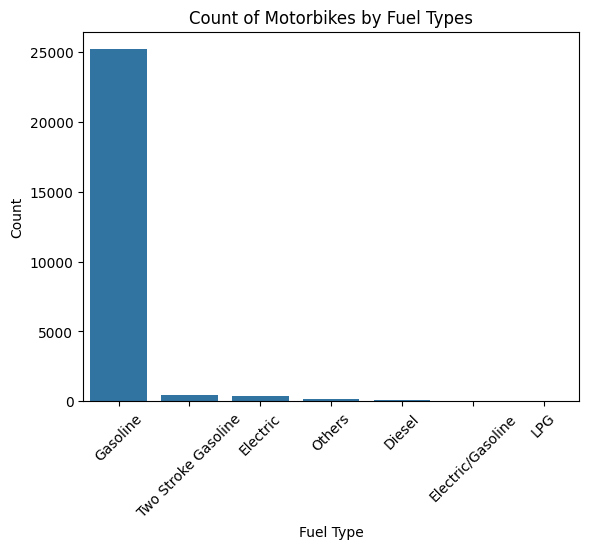

In [178]:
sns.countplot(x = 'fuel', data = df) # Plot with seaborn
# Visualize the count of motorbikes by fuel types
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count of Motorbikes by Fuel Types')
plt.xticks(rotation = 45)
# Rotate x-axis labels for better readability
plt.show()

The count plot shows the distribution of motorbikes across different fuel types in the dataset. The plot reveals that `Gasoline` is the dominant fuel type, with significantly more motorbikes than other fuel types. There are a few other fuel types present in the dataset, but in much smaller quantities. This indicates that the European motorbike market (as represented in this dataset) is heavily skewed towards gasoline-powered vehicles.

### Visualization 02: Average power of the motorbikes

In [179]:
gear_power = df.groupby('gear')['power'].mean()
gear_power
# Calculate average power for each gearbox type

gear
Automatic         80.23
Manual           103.79
Semi-automatic   126.93
Name: power, dtype: float64

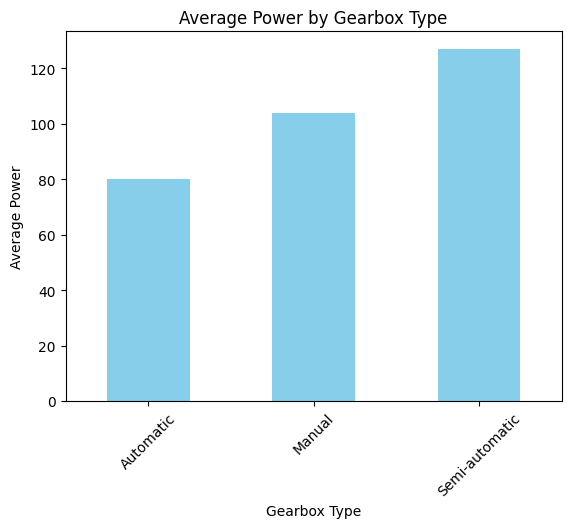

In [180]:
gear_power.plot(kind='bar', color='skyblue') # Plot with matplotlib
plt.xlabel('Gearbox Type')
plt.ylabel('Average Power')
plt.title('Average Power by Gearbox Type')
plt.xticks(rotation = 45)
plt.show()

The plot above visualizes the average power of motorbikes based on their gearbox type. It shows three categories: `Automatic`, `Manual`, and `Semi-automatic`. 
This indicates that motorbikes with semi-automatic gearboxes tend to have the highest average power, followed by manual and then automatic gearboxes. The plot effectively highlights the differences in performance associated with different gearbox types.

### Removing outliers by price

In [181]:
df['price'].describe()
# Get statistical summary of the 'price' column

count       29085.00
mean        52600.24
std       5314170.19
min             1.00
25%          6500.00
50%          9000.00
75%         13380.00
max     888888888.00
Name: price, dtype: float64

The `price` data is extremely right-skewed, with a maximum value (888,888,888) that is orders of magnitude larger than the median (9,000), indicating the presence of extreme outliers.  
- In EDA, these outliers can mislead charts and averages, making normal price patterns hard to see.  
- In machine learning, outliers can overpower the model and reduce prediction accuracy, so handling them is important.

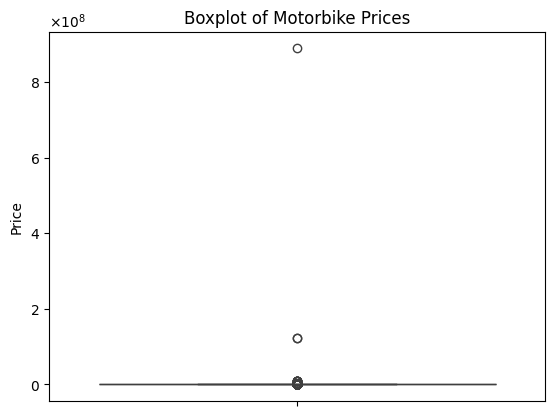

In [182]:
sns.boxplot(y = 'price', data = df) # Boxplot with seaborn
plt.ylabel('Price')
plt.title('Boxplot of Motorbike Prices')
plt.ticklabel_format(axis='y', style='sci', scilimits=(8,8), useMathText=True)
# Use scientific notation for y-axis 
plt.show()

The boxplot above clearly demonstrates the severe impact of outliers on data visualization. The extreme outliers (particularly the maximum price of 888,888,888) compress the box and whiskers to the bottom of the plot, making it nearly impossible to see the distribution of the majority of the data. The box itself becomes so small that it appears as a thin line, and the IQR (Interquartile Range) boundaries are hardly visible. By removing outliers using the IQR method, we can obtain a clearer view of the actual price distribution for the majority of motorbikes in the dataset.

In [183]:
Q1 = df['price'].quantile(0.25)
# Calculate first quartile (Q1)
Q3 = df['price'].quantile(0.75)
# Calculate third quartile (Q3)
IQR = Q3 - Q1
# Calculate interquartile range (IQR)

In [184]:
lower = Q1 - 1.5 * IQR
# Calculate lower bound for outliers
upper = Q3 + 1.5 * IQR
# Calculate upper bound for outliers

In [185]:
lower, upper
# Display lower and upper bounds

(np.float64(-3820.0), np.float64(23700.0))

In [186]:
outliers = df[(df['price'] < lower) | (df['price'] > upper)]
# Identify outlier rows based on price
clean_eda = df[(df['price'] >= lower) & (df['price'] <= upper)]
# Create a new DataFrame excluding outliers

In [187]:
df.shape, clean_eda.shape
# Compare shapes before and after outlier removal

((29085, 10), (27867, 10))

In [188]:
clean_eda['price'].describe()
# Get statistical summary of the 'price' column after outlier removal

count   27867.00
mean     9360.20
std      5340.12
min         1.00
25%      6490.00
50%      8900.00
75%     12700.00
max     23700.00
Name: price, dtype: float64

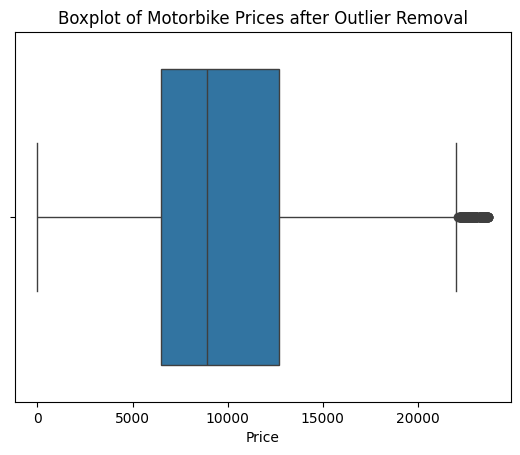

In [189]:
sns.boxplot(x=clean_eda['price']) # Boxplot with seaborn after outlier removal
plt.xlabel('Price')
plt.title('Boxplot of Motorbike Prices after Outlier Removal')
plt.show()

**Before Outlier Removal:**
- Dataset shape: (29085, 10)
- Price range: $1 - $888,888,888
- Price std dev: $5,314,170.19

**After Outlier Removal:**
- Dataset shape: (27867, 10)
- Price range: $1 - $23,700
- Price std dev: $5,340.12


*Why removing outliers made sense:*
1. The original dataset had extreme outliers (max: $888,888,888) that compressed the visualization
2. The boxplot before removal showed only a thin line, making it impossible to see actual price distribution
3. After removal, the boxplot clearly shows the interquartile range and median, revealing true pricing patterns
4. Standard deviation reduced significantly, indicating more stable and realistic price data
5. Removed rows represent only ~4% of data but had massive impact on visualization and analysis

In [190]:
clean_eda.head()
# Display the first 5 rows of the cleaned DataFrame

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
1,7500,2871,90.00,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.00,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.00,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...
5,1500,3000,1.00,Aprilia Mojito 50,07/2010,Gasoline,NaN,Used,NaN,/offers/aprilia-mojito-50-gasoline-black-9283e...


In [191]:
clean_eda.info()
# Get summary of the cleaned DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 1 to 34916
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       27867 non-null  int64  
 1   mileage     27867 non-null  int64  
 2   power       22740 non-null  float64
 3   make_model  27867 non-null  object 
 4   date        27867 non-null  object 
 5   fuel        25288 non-null  object 
 6   gear        10181 non-null  object 
 7   offer_type  27867 non-null  object 
 8   version     13800 non-null  object 
 9   link        27867 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.3+ MB


In [192]:
df = clean_eda
# Update df to the cleaned DataFrame without outliers 
df.shape
# Get the shape of the cleaned DataFrame

(27867, 10)

# Phase 2: Feature Engineering

Feature engineering is the process of selecting and transforming your raw information into a format that makes it easier for a machine learning model to understand and make accurate predictions. 

Instead of just giving the computer "raw ingredients," you are "preparing the meal" by turning words into numbers, selecting the most important columns, and adjusting the data so the patterns are as clear as possible.

In this motorbike project, this means taking the data cleaned during EDA and refining it into the final version the computer will use to calculate prices.

In [193]:
df.head()
# Display the first 5 rows of the cleaned DataFrame

,price,mileage,power,make_model,date,fuel,gear,offer_type,version,link
1,7500,2871,90.00,BMW F 800 GT,09/2018,Gasoline,Manual,Used,NaN,/offers/bmw-f-800-gt-gasoline-white-f65273c6-6...
2,800,1700,3.00,Nova Motors Retro Star,10/2019,Gasoline,NaN,Used,NaN,/offers/nova-motors-retro-star-gasoline-red-f8...
3,14990,24345,NaN,Aprilia RSV4,03/2016,Gasoline,NaN,Used,RF,/offers/aprilia-rsv4-rf-gasoline-silver-1b51fe...
4,6200,25000,128.00,Kawasaki Ninja ZX-6R,08/2009,Gasoline,NaN,Used,NaN,/offers/kawasaki-ninja-zx-6r-gasoline-blue-2f8...
5,1500,3000,1.00,Aprilia Mojito 50,07/2010,Gasoline,NaN,Used,NaN,/offers/aprilia-mojito-50-gasoline-black-9283e...


In [194]:
from sklearn import preprocessing
# Import the tools needed to transform data
label_encoder = preprocessing.LabelEncoder()
# Create a tool that converts text categories into numbers

In [195]:
df.columns
# List all column names in the DataFrame

Index(['price', 'mileage', 'power', 'make_model', 'date', 'fuel', 'gear',
       'offer_type', 'version', 'link'],
      dtype='object')

In [196]:
model_df = df[['mileage', 'power', 'fuel', 'offer_type', 'gear']]
model_df
# Select relevant columns for modeling

,mileage,power,fuel,offer_type,gear
1,2871,90.00,Gasoline,Used,Manual
2,1700,3.00,Gasoline,Used,NaN
3,24345,NaN,Gasoline,Used,NaN
4,25000,128.00,Gasoline,Used,NaN
5,3000,1.00,Gasoline,Used,NaN
...,...,...,...,...,...
34910,25400,NaN,Gasoline,Used,NaN
34912,10592,125.00,Gasoline,Used,Manual
34913,29000,54.00,Gasoline,Used,NaN
34915,11500,56.00,Gasoline,Used,Manual


In [197]:
df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['offer_type'] = label_encoder.fit_transform(df['offer_type'])
df['gear'] = label_encoder.fit_transform(df['gear'])
# Transform categorical columns into numerical format

In [198]:
model_df = df[['mileage', 'power', 'fuel', 'offer_type', 'gear']]
model_df
# Select relevant columns for modeling

,mileage,power,fuel,offer_type,gear
1,2871,90.00,3,4,1
2,1700,3.00,3,4,3
3,24345,NaN,3,4,3
4,25000,128.00,3,4,3
5,3000,1.00,3,4,3
...,...,...,...,...,...
34910,25400,NaN,3,4,3
34912,10592,125.00,3,4,1
34913,29000,54.00,3,4,3
34915,11500,56.00,3,4,1
